Importando todas bibliotecas

In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importando base de dados

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (4).csv


In [0]:
wineQ = pd.read_csv('winequality-red.csv', sep=';')

Visualizando dataset

Pergunta 1:

Pergunta 2:

In [4]:
# No dataset utilizado para o desafio, quantas instâncias e atributos existem, espectivamente?

# Quantos tipos diferentes de dados existem no dataset do desafio?

print(wineQ.shape)
wineQ.info()
wineQ.head()

# (1599,12)
# 2 - float64 e int64

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Pergunta 3:

In [5]:
# Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?

wineQ['residual sugar'].isnull().sum()

# 0%

0

Pergunta 4:

In [6]:
# Qual é o desvio padrão para a variável "fixed acidity" ?
wineQ['fixed acidity'].describe()

# 1.741096

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

Pergunta 5

In [7]:
# Qual é a mediana para a variável "residual sugar"?

wineQ['residual sugar'].median()

# 2.2

2.2

Pergunta 6

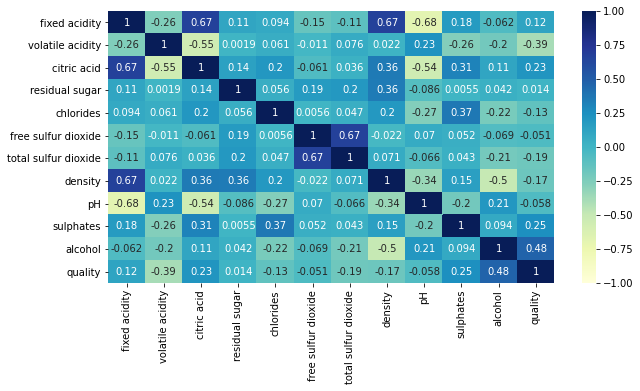

In [8]:
# Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:

plt.figure(figsize=(10, 5))
matriz_de_correlação = wineQ.corr()  #construindo a matriz de correlação
sns.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1, cmap="YlGnBu", center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

# Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".

Pergunta 7

In [0]:
# Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":

# Quanto maior o teor alcoolico (alcohol), maior é a qualidade do vinho (quality).

Pergunta 8

In [10]:
# Quantas instâncias existem para a qualidade do vinho igual a 5?

wineQ['quality'].value_counts()

# 681

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Pergunta 9

In [11]:
# Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

MinMaxScaler().fit_transform(wineQ[['fixed acidity','quality']]).min()

#0.0

0.0

Preparando os dados

In [0]:
#Separando colunas
X = wineQ.drop(columns=['quality'])
y = wineQ['quality']

#Normalizando os dados
scaler = MinMaxScaler()

#Padronizando os dados
X = scaler.fit_transform(X)

#Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

Criando os modelos

In [13]:
#KNN
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)

#Decision Tree
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)

#Random Forest
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)

#SVM
clf_SVM = SVC(gamma='auto', kernel='rbf')
clf_SVM.fit(X_train, y_train)

#MLP
clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Pergunta 10

In [14]:
#Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). 
#Qual foi a acurária para o KNN?

print("Acurácia: {}".format(clf_KNN.score(X_test, y_test)))

#0.5645

Acurácia: 0.5645833333333333


Pergunta 11

In [15]:
#Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio
# e a divisão de treinamento e teste como mostrado, anteriormente. 
#Qual é o valor da acurácia?

print("Acurácia: {}".format(clf_arvore.score(X_test, y_test)))

#0.5979

Acurácia: 0.6229166666666667


Pergunta 12

In [16]:
#Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado
# e mesmos valores treinamento e teste, qual é o valor da acurácia?

print("Acurácia: {}".format(clf_floresta.score(X_test, y_test)))

#0.6791

Acurácia: 0.6791666666666667


Pergunta 13

In [17]:
#Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, 
#qual é o valor de acurácia obtido?

print("Acurácia: {}".format(clf_SVM.score(X_test, y_test)))

#0.5854

Acurácia: 0.5854166666666667


Pergunta 14

In [18]:
#Aplicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, 
#qual é a acurácia do modelo?

print("Acurácia: {}".format(clf_mlp.score(X_test, y_test)))

#0.6

Acurácia: 0.6


Pergunta 15

In [0]:
#Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons
# e menores ou igual a 5 ruins (5, 4, 3). 

wineQ['quality'] = wineQ['quality'].replace(6, 1)
wineQ['quality'] = wineQ['quality'].replace(7, 1)
wineQ['quality'] = wineQ['quality'].replace(8, 1)
wineQ['quality'] = wineQ['quality'].replace(3, 0)
wineQ['quality'] = wineQ['quality'].replace(4, 0)
wineQ['quality'] = wineQ['quality'].replace(5, 0)

X = wineQ.drop(columns=['quality'])
y = wineQ['quality']

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [20]:
#Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
print("Acurácia: {}".format(clf_floresta.score(X_test, y_test)))

#0.8041

Acurácia: 0.8041666666666667
